<a href="https://colab.research.google.com/github/mariyagolchin/Breast-cancer-prediction-using-machine-learning/blob/main/Copy_of_Breast_Cancer_Dataset_Classification_Logistic%2C_Random_Forest%2C_KNN%2C_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project summary:
- The objective of the project was to build various models and compare their prediction performance based on accuracy.
- Built models trained on logistic regression, SVM, KNN, and random forest.
- By comparing the prediction accuracy of these models, it was found that model trained on logistic regression performed the best in classifying the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing essential packages and modules
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter('ignore')

# Using preloaded dataset in sklearn

In [ ]:
#Loading the breast cancer dataset
#brstcancer = datasets.load_breast_cancer()

In [ ]:
#Creating a copy
#brstcancer_data = brstcancer.data

In [ ]:
#convert to dataframe
#brstcancer_data = pd.DataFrame(brstcancer_data, columns = brstcancer.feature_names)

In [ ]:
#extract the target variable
#brstcancer_data['class'] = brstcancer.target

# Data Cleaning and preprocessing 

In [ ]:
#Load dataset using pandas
brstcancer_data = pd.read_csv('/content/drive/MyDrive/KaggleData/ Breast-cancer-data/clean-data.csv', index_col=False,)

In [ ]:
brstcancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#To print first few values
# brstcancer_data.drop('Unnamed: 0', axis=1, inplace=True)
# brstcancer_data.head()

In [ ]:
#Print shape of the dataset
brstcancer_data.shape

(569, 32)

In [ ]:
#Check for any missing values
brstcancer_data.isnull().values.any() 

True

In [ ]:
#Checking for missing value counts for each variable
brstcancer_data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [ ]:
#Checking overall for missing values
brstcancer_data.isnull().sum().sum() #returns overall sum

569

In [ ]:
#looking at summary using describe
brstcancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#frequency table
pd.crosstab(index = brstcancer_data['diagnosis'], columns = 'count')

col_0,count
diagnosis,
B,357
M,212


In [ ]:
type(brstcancer_data)

pandas.core.frame.DataFrame

In [ ]:
brstcancer_data.describe().unstack()

radius_mean  count    569.000000
             mean      14.127292
             std        3.524049
             min        6.981000
             25%       11.700000
                         ...    
Unnamed: 32  min             NaN
             25%             NaN
             50%             NaN
             75%             NaN
             max             NaN
Length: 248, dtype: float64

# Violin Plot of features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

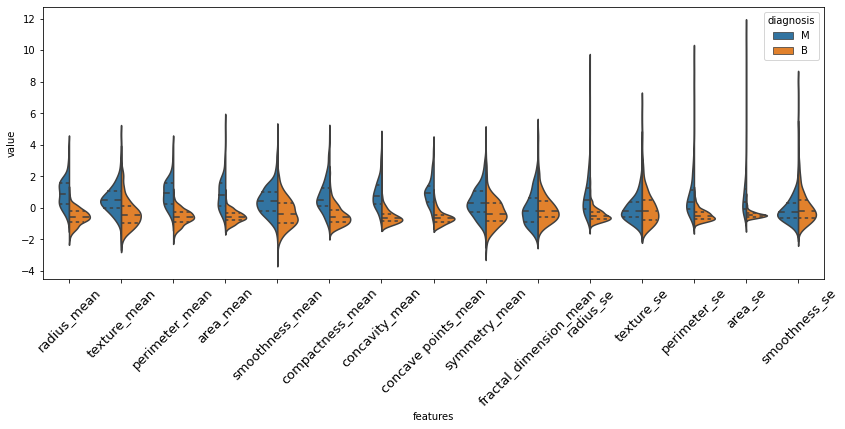

In [ ]:
# Using Violin Plot to check Malignant and Benign cancer Data
import seaborn as sns
data_dia = brstcancer_data['diagnosis']
data = brstcancer_data.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([brstcancer_data['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

## Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = brstcancer_data.values[:, 1:31]
Y = brstcancer_data.values[:,0]

#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
#we had to do this because strings won't work

In [ ]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.18600000000000005, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,  test_size = 0.3, random_state = 12)
accuracy = []
#names=[]

# x_train.to_csv('/content/drive/MyDrive/KaggleData/ Breast-cancer-data/train.csv',index=False)
# x_test.to_csv('/content/drive/MyDrive/KaggleData/ Breast-cancer-data/test.csv',index=False)

In [ ]:
print(x_test)
# with open('/content/drive/MyDrive/KaggleData/ Breast-cancer-data/test.csv', 'w') as FOUT:
#     np.savetxt(FOUT, x_test)

[[13.73 22.61 93.6 ... 0.2208 0.3596 0.1431]
 [12.3 19.02 77.88 ... 0.03983 0.2554 0.07207000000000001]
 [13.21 25.25 84.1 ... 0.06005 0.2444 0.06788]
 ...
 [9.731 15.34 63.78 ... 0.1571 0.3108 0.1259]
 [23.29 26.67 158.9 ... 0.2733 0.3198 0.08762]
 [12.46 19.89 80.43 ... 0.07625 0.2685 0.07764]]


In [ ]:
X

In [ ]:
Y

In [ ]:
import numpy
import numpy as np
import pandas as pd
numpy.savetxt('test.csv',x_test ,delimiter=',')


# Logistic regression


In [ ]:
#Initializing the model
model0 = LogisticRegression()

In [ ]:
#Fitting the model for the train data
model0.fit(x_train, y_train)

In [ ]:
#Predicting for the unseen data
predict0 = model0.predict(x_test)

In [ ]:
len(x_test[0])

In [ ]:
x_test[0:2]

In [ ]:
predict0

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
prediction = pd.DataFrame(predict0, columns=['predictions']).to_csv('prediction.csv')

In [ ]:
#Calculating the accuracy of the model
acc=accuracy_score(y_test, predict0)
accuracy.append(int(acc*100))
acc

0.9415204678362573

# Random Forest

In [ ]:
#Initializing the model
model1 = RandomForestClassifier()

In [ ]:
#Fitting the model for the train data
model1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predicting for the unseen/test data
predict1 = model1.predict(x_test)

In [ ]:
#Calculating the accuracy of the model
acc1=accuracy_score(y_test, predict1)
accuracy.append(int(acc1*100))
acc1

0.9239766081871345

# KNN

In [ ]:
#Initializing the model
model2 = KNeighborsClassifier()

In [ ]:
#Fitting the model for the train data
model2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting for the unseen/test data
predict2 = model2.predict(x_test)

In [ ]:
#Calculating the accuracy of the model
acc2=accuracy_score(y_test, predict2)
accuracy.append(int(acc2*100))
acc2

0.8888888888888888

# SVM 


In [ ]:
#Initializing the model
model3 = SVC()

In [ ]:
#Fitting the model for the train data
model3.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predicting for the unseen/test data
predict3 = model3.predict(x_test)

In [ ]:
#Calculating the accuracy of the model
acc3=accuracy_score(y_test, predict3)
accuracy.append(int(acc3*100))
acc3

0.8771929824561403

# Comparison

Text(0.5, 1.0, 'Accuracies of Models')

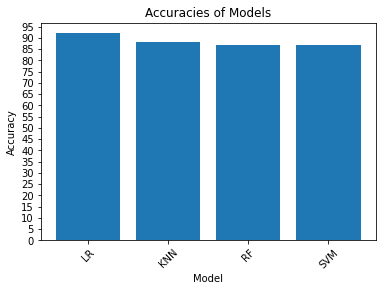

In [ ]:
Index = [1,2,3,4]
name=["LR","KNN","RF","SVM"]
#accuracy = [10,88,96,66]
plt.bar(Index,accuracy)
plt.xticks(Index, name, rotation=45)
#plt.yticks([0.0,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
plt.yticks(np.arange(0, 100, 5)) 
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

# Conclusion

Model trained on Logistic Regression performed the best in classifying the dataset. The accuracy was found to be 94.15 %

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'SVM' , SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
for name, model in models:
 #kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 #kfold = KFold(n_splits=4, random_state=seed, shuffle=True)
 kfold = KFold(n_splits=4, shuffle=False)
 cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 print("accuracies for",name)
 print(cv_results)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for four classifiers') 

accuracies for LR
[0.97       0.97       0.94949495 0.93939394]
LR: 0.957222 (0.013267)
accuracies for KNN
[0.93       0.9        0.96969697 0.90909091]
KNN: 0.927197 (0.026840)
accuracies for RF
[0.98       0.95       0.98989899 0.93939394]
RF: 0.964823 (0.020770)
accuracies for SVM
[0.94       0.86       0.96969697 0.91919192]
SVM: 0.922222 (0.040158)
-> 10-Fold cross-validation accurcay score for the training data for four classifiers


Text(0.5, 1.0, 'Comparison of accuracy for each Iteration in LR')

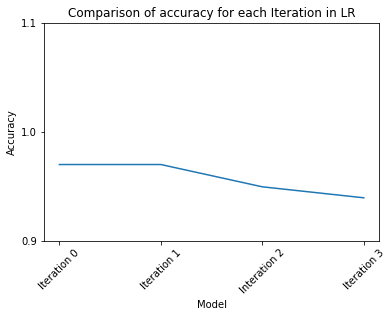

In [ ]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
#accuracy = [10,88,96,66]
pylt.plot(Index,results[0])
pylt.xticks(Index, name, rotation=45)
#plt.yticks([0.0,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
pylt.yticks(np.arange(0.9, 1.2, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of accuracy for each Iteration in LR')

Text(0.5, 1.0, 'Comparison of accuracy for each Iteration inKNN')

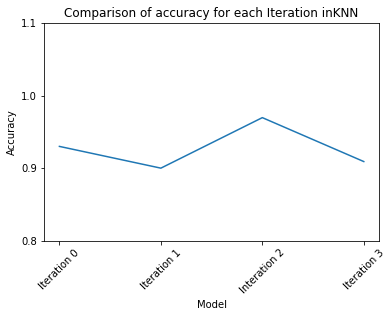

In [ ]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
#accuracy = [10,88,96,66]
pylt.plot(Index,results[1])
pylt.xticks(Index, name, rotation=45)
#plt.yticks([0.0,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
pylt.yticks(np.arange(0.8, 1.2, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of accuracy for each Iteration inKNN')

Text(0.5, 1.0, 'Comparison of accuracy for each Iteration in RF')

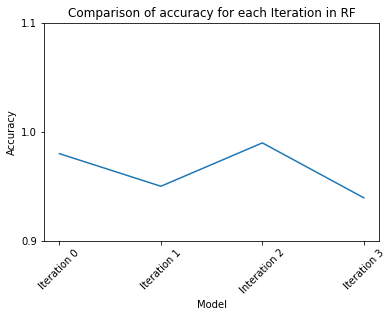

In [ ]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
#accuracy = [10,88,96,66]
pylt.plot(Index,results[2])
pylt.xticks(Index, name, rotation=45)
#plt.yticks([0.0,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
pylt.yticks(np.arange(0.9, 1.2, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of accuracy for each Iteration in RF')

Text(0.5, 1.0, 'Comparison of accuracy for each Iteration in SVM')

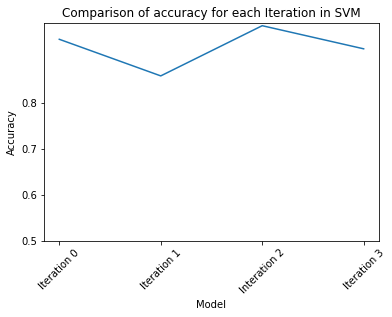

In [ ]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
#accuracy = [10,88,96,66]
pylt.plot(Index,results[3])
pylt.xticks(Index, name, rotation=45)
#plt.yticks([0.0,0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
pylt.yticks(np.arange(0.5, 0.9, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of accuracy for each Iteration in SVM')

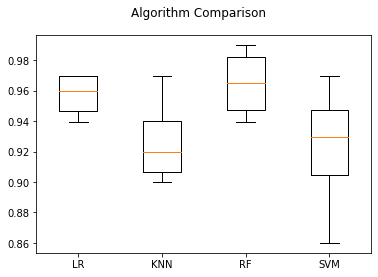

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observation
The results show a similar distribution for all classifiers except SVM which is suggesting low variance.

It is possible the varied distribution of the attributes may have an effect on the accuracy of algorithms such as SVM. We will repeat the above code with a standardized copy of the training dataset.

# standardised data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))

pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))

pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'RF' ,
    RandomForestClassifier())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))

results = []
names = []
for name, model in pipelines:
  #kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  #kfold = KFold(n_splits=4, random_state=seed, shuffle=True)
  kfold = KFold(n_splits=4, shuffle=False)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.974924 (0.014958)
ScaledKNN: 0.959798 (0.007145)
ScaledRF: 0.967348 (0.024024)
ScaledSVM: 0.972399 (0.008200)


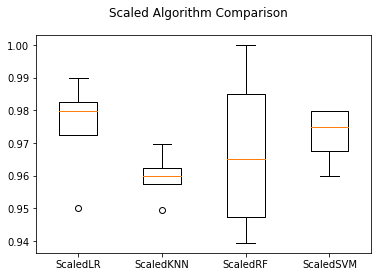

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show that standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.